In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

# Enter path to the data_fusion_guest_lecture file
image_folder_path = "data"  

# Loads labels
df = pd.read_csv(os.path.join(image_folder_path, "seedling_labels.csv"))

# Creates path to top & side view
df["color_cam_path"] = image_folder_path + "/" + df["color_cam_path"]
df["side_cam_path"] = image_folder_path + "/" + df["side_cam_path"]

# Gives average expert label as a starting point
df["average_expert"] = (df["Expert 1"] + df["Expert 2"]  + df["Expert 3"] + df["Expert 4"]) / 4
print('Each row is an image pair of one color and one side view of one specific plant, together with the expert opinion (1,2 = normal, 3,4 = abnormal).')

df

Each row is an image pair of one color and one side view of one specific plant, together with the expert opinion (1,2 = normal, 3,4 = abnormal).


,Expert 1,Expert 2,Expert 3,Expert 4,color_cam_path,side_cam_path,Rfid,Pos,average_expert
0,4,4,4,4,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,A1,Plant 0000,4.00
1,1,1,1,1,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,A1,Plant 0001,1.00
2,1,1,1,1,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,A1,Plant 0002,1.00
3,4,4,3,3,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,A1,Plant 0003,3.50
4,3,1,1,1,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,A1,Plant 0004,1.50
...,...,...,...,...,...,...,...,...,...
989,1,1,1,1,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,B4,Plant 0122,1.00
990,1,1,1,1,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,B4,Plant 0123,1.00
991,1,1,1,1,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,B4,Plant 0124,1.00
992,2,3,3,3,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,B4,Plant 0125,2.75


## Generate a score using Cohen Kappa for each expert

In [2]:
from sklearn.metrics import cohen_kappa_score
import numpy as np
from collections import Counter
experts = ["Expert 1", "Expert 2", "Expert 3", "Expert 4" ]
expert_Kappas=[[],[],[],[]]
weights = []
labels = []
i=0 
j=0

for i in range(len(experts)):
    for j in range(len(experts)):
        if i!=j:
            ratings = [df[experts[i]].values.tolist(),df[experts[j]].values.tolist()]
            kappa = cohen_kappa_score(ratings[0],ratings[1])
            expert_Kappas[i].append(kappa)

for kappa in expert_Kappas:
    weights.append(np.sum(kappa)/3)
votes = df[["Expert 1", "Expert 2","Expert 3", "Expert 4"]].values.tolist()    
for vote in votes:
    weighted_votes = Counter()
    for i, vot in enumerate(vote):
        weighted_votes[vot] += weights[i]

    # get the winner(s) of the vote
    winners = [vote for vote, count in weighted_votes.items() if count == max(weighted_votes.values())]
    labels.append(winners[0])
    
df["labels"]  = labels
# Round so we can replace
df['average_expert_rounded'] = df['average_expert'].round(0).astype(np.int64)

In [3]:
df

,Expert 1,Expert 2,Expert 3,Expert 4,color_cam_path,side_cam_path,Rfid,Pos,average_expert,labels,average_expert_rounded
0,4,4,4,4,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,A1,Plant 0000,4.00,4,4
1,1,1,1,1,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,A1,Plant 0001,1.00,1,1
2,1,1,1,1,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,A1,Plant 0002,1.00,1,1
3,4,4,3,3,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,A1,Plant 0003,3.50,3,4
4,3,1,1,1,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,A1,Plant 0004,1.50,1,2
...,...,...,...,...,...,...,...,...,...,...,...
989,1,1,1,1,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,B4,Plant 0122,1.00,1,1
990,1,1,1,1,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,B4,Plant 0123,1.00,1,1
991,1,1,1,1,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,B4,Plant 0124,1.00,1,1
992,2,3,3,3,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,B4,Plant 0125,2.75,3,3


In [4]:
# create a Boolean DataFrame indicating where the two columns are equal
equal_df = df["labels"].eq(df["average_expert_rounded"])

# calculate the percentage of differences
diff_percentage = 100 - (equal_df.sum() / equal_df.count() * 100)

print(f"The percentage of differences between the two columns is: {diff_percentage:.2f}%")

diff_count = (~equal_df).sum()

print(f"The number of differences between the two columns is: {diff_count}")

The percentage of differences between the two columns is: 7.55%
The number of differences between the two columns is: 75


## Convert (1,2 = normal, 3,4 = abnormal) because it will be binary classification

In [5]:
# 0 = normal
# 1 = abnormal

df[['Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'average_expert', 'labels']] = df[['Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'average_expert', 'labels']].replace({1: 0, 2: 0})
df[['Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'average_expert', 'labels']] = df[['Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'average_expert', 'labels']].replace([3,4], 1)

df

,Expert 1,Expert 2,Expert 3,Expert 4,color_cam_path,side_cam_path,Rfid,Pos,average_expert,labels,average_expert_rounded
0,1,1,1,1,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,A1,Plant 0000,1.00,1,4
1,0,0,0,0,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,A1,Plant 0001,0.00,0,1
2,0,0,0,0,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,A1,Plant 0002,0.00,0,1
3,1,1,1,1,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,A1,Plant 0003,3.50,1,4
4,1,0,0,0,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,A1,Plant 0004,1.50,0,2
...,...,...,...,...,...,...,...,...,...,...,...
989,0,0,0,0,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,B4,Plant 0122,0.00,0,1
990,0,0,0,0,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,B4,Plant 0123,0.00,0,1
991,0,0,0,0,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,B4,Plant 0124,0.00,0,1
992,0,1,1,1,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,B4,Plant 0125,2.75,1,3


### Model Training

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

## CNN using transfer learning with MobileNetV2 as the base model
The MobileNetV2 model is used as a feature extractor and then the extracted features are flattened and passed through a few dense layers with dropout before the final classification layer. The model is then trained on the input images using the ```ImageDataGenerator``` to generate batches of augmented images and passed through the model.

###### COLOR CAM, MODEL 1

In [11]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Set up a TensorFlow session to use the GPU if available
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    except RuntimeError as e:
        print(e)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator1 = train_datagen.flow_from_dataframe(
    train_df,
    x_col='color_cam_path',
    y_col='labels',
    target_size=(224, 224),
    batch_size=8,
    class_mode='raw')

test_generator1 = test_datagen.flow_from_dataframe(
    test_df,
    x_col='color_cam_path',
    y_col='labels',
    target_size=(224, 224),
    batch_size=8,
    class_mode='raw')

Found 795 validated image filenames.
Found 199 validated image filenames.


In [84]:
# load the MobileNetV2 model
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# unfreeze the last few layers for fine-tuning
for layer in mobilenet_model.layers[:-4]:
    layer.trainable = False

# build the model
model = tf.keras.models.Sequential([
    mobilenet_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(train_generator, epochs=5)

Found 795 validated image filenames.
Found 199 validated image filenames.
9406464/9406464 [==============================] - 4s 0us/step


Epoch 1/5
100/100 [==============================] - 92s 806ms/step - loss: 2.8164 - accuracy: 0.8113
Epoch 2/5
100/100 [==============================] - 79s 793ms/step - loss: 0.4549 - accuracy: 0.8742
Epoch 3/5
100/100 [==============================] - 78s 781ms/step - loss: 0.3524 - accuracy: 0.8742
Epoch 4/5
100/100 [==============================] - 81s 805ms/step - loss: 0.3392 - accuracy: 0.8956
Epoch 5/5
25/25 [==============================] - 16s 564ms/step


###### Save model so it can be used later again without training again

In [92]:
# save the model to a file
model.save('model1_color_cam.h5') # Accurary was 0.909547746181488

###### SIDE CAM, MODEL 2

In [47]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Set up a TensorFlow session to use the GPU if available
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    except RuntimeError as e:
        print(e)

# Define the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen.flow_from_dataframe(
    train_df,
    x_col='side_cam_path',
    y_col='labels',
    target_size=(224, 224),
    batch_size=10,
    class_mode='raw')

test_generator2 = test_datagen.flow_from_dataframe(
    test_df,
    x_col='side_cam_path',
    y_col='labels',
    target_size=(224, 224),
    batch_size=10,
    class_mode='raw')

Found 795 validated image filenames.
Found 199 validated image filenames.


In [49]:
# load the MobileNetV2 model
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# unfreeze the last few layers for fine-tuning
for layer in mobilenet_model.layers[:-4]:
    layer.trainable = False

# build the model
model2 = tf.keras.models.Sequential([
    mobilenet_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# compile the model
model2.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model2.fit(train_generator2, epochs=5)

Epoch 1/8
80/80 [==============================] - 262s 3s/step - loss: 0.6911 - accuracy: 0.6742
Epoch 2/8
80/80 [==============================] - 268s 3s/step - loss: 0.4211 - accuracy: 0.8277
Epoch 3/8
80/80 [==============================] - 268s 3s/step - loss: 0.2662 - accuracy: 0.9195
Epoch 4/8
80/80 [==============================] - 266s 3s/step - loss: 0.2231 - accuracy: 0.9069
Epoch 5/8
80/80 [==============================] - 263s 3s/step - loss: 0.2249 - accuracy: 0.9283
Epoch 6/8
80/80 [==============================] - 262s 3s/step - loss: 0.2331 - accuracy: 0.9245
Epoch 7/8
80/80 [==============================] - 263s 3s/step - loss: 0.3252 - accuracy: 0.9057
Epoch 8/8
80/80 [==============================] - 263s 3s/step - loss: 0.2385 - accuracy: 0.9157


###### Save model so it can be used later again without training again

In [96]:
# save the model to a file
model2.save('model2_side_cam.h5') # Accurary was 0.8994975090026855

### Load already trained models and predict

In [54]:
from tensorflow.keras.models import load_model

model1 = load_model('model1_color_cam.h5')
model2 = load_model('model2_side_cam.h5')

In [61]:
def predict(model, test_generator):
    # predict the labels for test data
    test_generator.reset()
    pred = model.predict(test_generator)

    # convert the predictions to binary labels
    pred_labels = [1 if p >= 0.5 else 0 for p in pred]
    
    return pred_labels, pred

def accuracy(model, test_generator, model_number):
    loss, accuracy = model.evaluate(test_generator)
    print('Accuracy on test set for model number', model_number, ': ', accuracy)
    
    
pred_labels1, pred1 = predict(model1, test_generator1)
print('Prediction done, Model 1')
pred_labels2, pred2 = predict(model2, test_generator2)
print('Prediction done, Model 2')

accuracy(model1, test_generator1, '1')
accuracy(model2, test_generator2, '2')

25/25 [==============================] - 11s 419ms/step
Prediction done, Model 1
20/20 [==============================] - 9s 422ms/step
Prediction done, Model 2
25/25 [==============================] - 15s 604ms/step - loss: 0.2489 - accuracy: 0.9095
Accuracy on test set for model number 1 :  0.909547746181488
20/20 [==============================] - 8s 411ms/step - loss: 0.6707 - accuracy: 0.8995
Accuracy on test set for model number 2 :  0.8994975090026855


In [64]:
# The probability of each class, rounded
pred1 = np.round(pred1, 3)
pred2 = np.round(pred2, 3)

pred1_df = pd.DataFrame(pred1, columns=['pred1'])
pred2_df = pd.DataFrame(pred2, columns=['pred2'])

In [65]:
true_labels_df = pd.DataFrame({'true_labels': test_generator1.labels})
pred_labels_df1 = pd.DataFrame({'pred_labels1_color': pred_labels1})
pred_labels_df2 = pd.DataFrame({'pred_labels2_side': pred_labels2})

result_df = pd.concat([true_labels_df, pred1_df, pred_labels_df1, pred2_df, pred_labels_df2], axis=1)

result_df

,true_labels,pred1,pred_labels1_color,pred2,pred_labels2_side
0,0,0.003,0,0.000,0
1,0,0.046,0,0.002,0
2,0,0.000,0,0.000,0
3,0,0.998,1,0.001,0
4,0,0.009,0,0.998,1
...,...,...,...,...,...
194,0,0.005,0,0.000,0
195,0,0.203,0,0.000,0
196,0,0.108,0,0.000,0
197,1,0.012,0,0.000,0


## Feature Extraction using Local Binary Pattern(LBP)

In [206]:
def ext_colored_features(path):
    # Load the image
    img = io.imread(path, as_gray=True)
    lbp_features = feature.local_binary_pattern(img, P=8, R=1.0, method='uniform')
    lbp_features = lbp_features.reshape((lbp_features.shape[0], -1))
    # Compute histogram of LBP values
    hist, _ = np.histogram(lbp_features.ravel(), bins=np.arange(0, 24 + 3), range=(0, 24 + 2))
    # Normalize histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist
def ext_side_features(path):
    # Load the image
    img = io.imread(path)
    lbp_features = feature.local_binary_pattern(img, P=8, R=1.0, method='uniform')
    lbp_features = lbp_features.reshape((lbp_features.shape[0], -1))
    # Compute histogram of LBP values
    hist, _ = np.histogram(lbp_features.ravel(), bins=np.arange(0, 24 + 3), range=(0, 24 + 2))
    # Normalize histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

In [207]:
import numpy as np
from skimage import io, feature
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier 

#divide instances into training and testing 
X_train, X_test, y_train, y_test = train_test_split(df[["color_cam_path","side_cam_path"]],  df["labels"], random_state=42)
features_lbp_color_tr = []
features_lbp_side_tr = []
features_lbp_color_ts = []
features_lbp_side_ts = []
for path in X_train["color_cam_path"]:
    features_lbp_color_tr.append(ext_colored_features(path))
for path in X_train["side_cam_path"]:
    features_lbp_side_tr.append(ext_side_features(path))
for path in X_test["color_cam_path"]:
    features_lbp_color_ts.append(ext_colored_features(path))
for path in X_test["side_cam_path"]:
    features_lbp_side_ts.append(ext_side_features(path))

# Train KNN classifier
knn_color = KNeighborsClassifier(n_neighbors=5)
knn_color.fit(features_lbp_color_tr, y_train)

# Predict labels for test set
y_pred = knn_color.predict(features_lbp_color_ts)

# Evaluate classifier performance
accuracy_color = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_color)

# Train KNN classifier
knn_side = KNeighborsClassifier(n_neighbors=5)
knn_side.fit(features_lbp_side_tr, y_train)

# Predict labels for test set
y_pred = knn_side.predict(features_lbp_side_ts)

# Evaluate classifier performance
accuracy_side = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_side)

fused_features_tr = np.concatenate([features_lbp_color_tr, features_lbp_side_tr], axis=1)
fused_features_ts = np.concatenate([features_lbp_color_ts, features_lbp_side_ts], axis=1)
# Train KNN classifier
knn_fused = KNeighborsClassifier(n_neighbors=5)
knn_fused.fit(fused_features_tr, y_train)

# Predict labels for test set
y_pred = knn_fused.predict(fused_features_ts)

# Evaluate classifier performance
accuracy_fused = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_fused)

    

Accuracy: 0.6345381526104418
Accuracy: 0.8072289156626506
Accuracy: 0.7831325301204819


### Weighted Voting for the two models

In [76]:
def weighted_vote(row):
    # higher weight for the model with higher accuracy
    w1 = 0.4
    w2 = 0.6

    vote = w1 * row['pred1'] + w2 * row['pred2']

    return round(vote, 3)

result_df['weighted_vote'] = result_df.apply(weighted_vote, axis=1)
result_df['weighted_vote_binary'] = result_df['weighted_vote'].apply(lambda x: 1 if x >= 0.5 else 0)
result_df

,true_labels,pred1,pred_labels1_color,pred2,pred_labels2_side,weighted_vote,weighted_vote_binary
0,0,0.003,0,0.000,0,0.001,0
1,0,0.046,0,0.002,0,0.020,0
2,0,0.000,0,0.000,0,0.000,0
3,0,0.998,1,0.001,0,0.400,0
4,0,0.009,0,0.998,1,0.602,1
...,...,...,...,...,...,...,...
194,0,0.005,0,0.000,0,0.002,0
195,0,0.203,0,0.000,0,0.081,0
196,0,0.108,0,0.000,0,0.043,0
197,1,0.012,0,0.000,0,0.005,0


In [77]:
# Calculate the accuracy given scikit
acc = accuracy_score(result_df['true_labels'], result_df['weighted_vote_binary'])

acc

0.6532663316582915

# Using PyTorch

#### Model 1: Color cam

In [191]:
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

# Define a transformation to apply to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Split the dataframe into training and testing sets
train_df = df.sample(frac=0.8, random_state=123)
test_df = df.drop(train_df.index)

# Define custom dataset classes to load the images and their labels
class CustomDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]['color_cam_path']
        label = self.df.iloc[idx]['labels']
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image, label

# Create custom dataset objects for the training and testing sets
train_dataset = CustomDataset(train_df, transform=transform)
test_dataset = CustomDataset(test_df, transform=transform)

# Define data loaders for the training and testing sets
trainloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [192]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(16 * 56 * 56, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 56 * 56)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [193]:
%%time
import torch.optim as optim

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.1, verbose=True)

for epoch in range(9):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

    # Evaluate model on validation set
    val_loss = 0.0
    val_total = 0
    val_correct = 0
    net.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    # Print validation metrics
    val_accuracy = 100 * val_correct / val_total
    print('Epoch: %d, Training Loss: %.3f, Validation Loss: %.3f, Validation Accuracy: %.2f%%' %
          (epoch + 1, running_loss / len(trainloader), val_loss / len(testloader), val_accuracy))

    # Adjust learning rate based on validation loss
    scheduler.step(val_loss)

    # Save model checkpoint
    if val_loss < 10:
        best_val_loss = val_loss
        torch.save(net.state_dict(), 'model1_color_pytorch.pth')
    
    net.train()

# Load best model checkpoint and evaluate on test set
net.load_state_dict(torch.load('model1_color_pytorch.pth'))
net.eval()

test_correct = 0
test_total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

print('Test Accuracy: %.2f%%' % (100 * test_correct / test_total))

Epoch: 1, Training Loss: 0.695, Validation Loss: 0.659, Validation Accuracy: 63.32%
Epoch: 2, Training Loss: 0.570, Validation Loss: 0.620, Validation Accuracy: 63.32%
Epoch: 3, Training Loss: 0.510, Validation Loss: 0.571, Validation Accuracy: 63.32%
Epoch: 4, Training Loss: 0.388, Validation Loss: 0.532, Validation Accuracy: 69.85%
Epoch: 5, Training Loss: 0.314, Validation Loss: 0.416, Validation Accuracy: 88.94%
Epoch: 6, Training Loss: 0.290, Validation Loss: 0.417, Validation Accuracy: 89.95%
Epoch: 7, Training Loss: 0.289, Validation Loss: 0.422, Validation Accuracy: 88.94%
Epoch: 8, Training Loss: 0.255, Validation Loss: 0.419, Validation Accuracy: 87.94%
Epoch 00008: reducing learning rate of group 0 to 1.0000e-04.
Epoch: 9, Training Loss: 0.237, Validation Loss: 0.446, Validation Accuracy: 88.94%
Test Accuracy: 88.94%
Wall time: 14min 34s


In [206]:
# Define function to predict label and class probability
def predict(image):
    with torch.no_grad():
        output = net(image.unsqueeze(0))
        prob = F.softmax(output, dim=1)
        label = torch.argmax(prob, dim=1).item()
        prob = prob[0][1].item()
    return label, prob

# Iterate through test set and predict label and class probability for each image
data = []
net.eval()
with torch.no_grad():
    for inputs, labels in testloader:
        for i in range(len(inputs)):
            true_label = labels[i].item()
            predicted_label, class_prob = predict(inputs[i])
            data.append({
                'true_label': true_label,
                'predicted_label': predicted_label,
                'class_prob': class_prob
            })

# Convert list of dictionaries to dataframe
results_df1 = pd.DataFrame(data)

# Convert predicted label to binary value based on class probability
results_df1['predicted_label'] = np.where(results1['class_prob'] > 0.5, 1, 0)
results_df1

,true_label,predicted_label,class_prob
0,0,0,0.016023
1,1,1,0.568752
2,0,0,0.003446
3,1,1,0.568752
4,1,1,0.562920
...,...,...,...
194,0,0,0.033750
195,1,1,0.568752
196,1,0,0.057280
197,0,0,0.003989


#### Model 2: Side cam

In [123]:
class Normalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        if tensor.size(0) == 1:
            # grayscale image
            mean = torch.tensor(self.mean)[[0], [0], [0]]
            std = torch.tensor(self.std)[[0], [0], [0]]
        else:
            # color image
            mean = self.mean
            std = self.std

        return F.normalize(tensor, mean=mean, std=std)

In [167]:
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize, Grayscale
from PIL import Image

# Define a transformation to apply to the images
Normalize_transform = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
transform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3), # convert to 3 channels
    transforms.ToTensor(),
    Normalize_transform
])
# Split the dataframe into training and testing sets
train_df = df.sample(frac=0.8, random_state=123)
test_df = df.drop(train_df.index)

class CustomDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]['side_cam_path']
        label = self.df.iloc[idx]['labels']
        image = Image.open(img_path)
        if image.mode != 'RGB':
            # convert grayscale to RGB
            image = Image.merge('RGB', [image]*3)
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(label, dtype=torch.long)
        return image, label

# Create custom dataset objects for the training and testing sets
train_dataset = CustomDataset(train_df, transform=transform)
test_dataset = CustomDataset(test_df, transform=transform)

# Define data loaders for the training and testing sets
trainloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [168]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        # adjust the kernel sizes of the convolutional layers to match the new input size
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 53 * 53, 120)  # adjust the input size of the first fully connected layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # adjust the view statement to match the output size of the second convolutional layer
        x = x.view(-1, 16 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [170]:
%%time
import torch.optim as optim

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.1, verbose=True)

for epoch in range(7):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

    # Reset running_loss to 0 at the end of each epoch
    running_loss = 0.0
    
    # Evaluate model on validation set
    val_loss = 0.0
    val_total = 0
    val_correct = 0
    net.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    # Print validation metrics
    val_accuracy = 100 * val_correct / val_total
    print('Epoch: %d, Training Loss: %.3f, Validation Loss: %.3f, Validation Accuracy: %.2f%%' %
          (epoch + 1, running_loss / len(trainloader), val_loss / len(testloader), val_accuracy))

    # Adjust learning rate based on validation loss
    scheduler.step(val_loss)

    # Save model checkpoint
    if val_loss < 10:
        best_val_loss = val_loss
        torch.save(net.state_dict(), 'model2_side_pytorch.pth')
    
    net.train()

# Load best model checkpoint and evaluate on test set
net.load_state_dict(torch.load('model2_side_pytorch.pth'))
net.eval()

test_correct = 0
test_total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

print('Test Accuracy: %.2f%%' % (100 * test_correct / test_total))

Epoch: 1, Training Loss: 0.000, Validation Loss: 0.577, Validation Accuracy: 78.39%
Epoch: 2, Training Loss: 0.000, Validation Loss: 0.539, Validation Accuracy: 77.89%
Epoch: 3, Training Loss: 0.000, Validation Loss: 0.611, Validation Accuracy: 75.88%
Epoch: 4, Training Loss: 0.000, Validation Loss: 0.600, Validation Accuracy: 76.88%
Epoch: 5, Training Loss: 0.000, Validation Loss: 0.671, Validation Accuracy: 79.40%
Epoch 00005: reducing learning rate of group 0 to 1.0000e-04.
Epoch: 6, Training Loss: 0.000, Validation Loss: 0.644, Validation Accuracy: 84.42%
Epoch: 7, Training Loss: 0.000, Validation Loss: 0.655, Validation Accuracy: 82.41%
Test Accuracy: 82.41%
Wall time: 5min 19s


In [190]:
# Create an empty list to hold the results
results = []

# Set the model to evaluation mode
net.eval()

# Turn off gradient calculations to save memory and computation
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)

        # Get the predicted class labels and class probabilities
        _, predicted = torch.max(outputs.data, 1)
        probs = torch.nn.functional.softmax(outputs, dim=1)

        # Convert PyTorch tensors to numpy arrays
        true_labels = labels.numpy()
        predicted_labels = predicted.numpy()
        class_probs = probs.numpy()[:, 1]  # Only include probabilities for class 1

        # Append the results to the list
        for i in range(len(true_labels)):
            results.append([true_labels[i], predicted_labels[i], class_probs[i]])

# Convert the list of results to a pandas DataFrame
results_df2 = pd.DataFrame(results, columns=['True Label', 'Predicted Label', 'Class Probabilities'])
results_df2

,True Label,Predicted Label,Class Probabilities
0,0,0,0.000367
1,1,1,0.894325
2,0,0,0.009980
3,1,1,0.895022
4,1,0,0.018549
...,...,...,...
194,0,0,0.034388
195,1,1,0.890232
196,1,0,0.015134
197,0,0,0.400080


#### Weighted Voting

In [211]:
merged_df = pd.DataFrame()
merged_df['class_probs_model1_color'] = results_df1['class_prob']
merged_df['pred_model1_color'] = results_df1['predicted_label']
merged_df['class_probs_model2_side'] = results_df2['Class Probabilities']
merged_df['pred_model2_side'] = results_df2['Predicted Label']
merged_df['true_labels'] = results_df1['true_label']

merged_df

,class_probs_model1_color,pred_model1_color,class_probs_model2_side,pred_model2_side,true_labels
0,0.016023,0,0.000367,0,0
1,0.568752,1,0.894325,1,1
2,0.003446,0,0.009980,0,0
3,0.568752,1,0.895022,1,1
4,0.562920,1,0.018549,0,1
...,...,...,...,...,...
194,0.033750,0,0.034388,0,0
195,0.568752,1,0.890232,1,1
196,0.057280,0,0.015134,0,1
197,0.003989,0,0.400080,0,0


In [226]:
def weighted_vote(row):
    # higher weight for the model with higher accuracy
    w1 = 0.9
    w2 = 0.1

    vote = w1 * row['class_probs_model1_color'] + w2 * row['class_probs_model2_side']

    return round(vote, 3)

merged_df['weighted_vote'] = merged_df.apply(weighted_vote, axis=1)
merged_df['weighted_vote_binary'] = merged_df['weighted_vote'].apply(lambda x: 1 if x >= 0.5 else 0)
merged_df

,class_probs_model1_color,pred_model1_color,class_probs_model2_side,pred_model2_side,true_labels,weighted_vote,weighted_vote_binary
0,0.016023,0,0.000367,0,0,0.014,0
1,0.568752,1,0.894325,1,1,0.601,1
2,0.003446,0,0.009980,0,0,0.004,0
3,0.568752,1,0.895022,1,1,0.601,1
4,0.562920,1,0.018549,0,1,0.508,1
...,...,...,...,...,...,...,...
194,0.033750,0,0.034388,0,0,0.034,0
195,0.568752,1,0.890232,1,1,0.601,1
196,0.057280,0,0.015134,0,1,0.053,0
197,0.003989,0,0.400080,0,0,0.044,0


In [227]:
# Calculate the accuracy given scikit
acc = accuracy_score(merged_df['true_labels'], merged_df['weighted_vote_binary'])

acc

0.8894472361809045

### Mid-level fusion

In [6]:
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [7]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df[['color_cam_path', 'side_cam_path']], df['labels'],
                                                    random_state=42)

#### Feature extraction using ORB

In [8]:
def ORB_color(paths):
    des_list = []
    orb = cv2.ORB_create()
    for i in range(0, len(paths)):
        img = cv2.imread(paths[i])
        kp, des = orb.detectAndCompute(img, None)
        des_list.append((paths[i], des))
    return des_list


def ORB_side(paths):
    des_list = []
    orb = cv2.ORB_create()
    for i in range(0, len(paths)):
        img = cv2.imread(paths[i])
        kp, des = orb.detectAndCompute(img, None)
        des_list.append((paths[i], des))
    return des_list

In [9]:
def feature_extraction(des_list):
    # Convert the features into a numpy array
    descriptors = des_list[0][1]
    for image_path, descriptor in des_list[1:]:
        descriptors = np.vstack((descriptors, descriptor))
    # Convert into float
    descriptors_float = descriptors.astype(float)
    # Clustering the features
    kmeans_retrval, variance = kmeans(descriptors_float, k_or_guess=35)
    # Create a histogram of features
    im_features = np.zeros((len(des_list), 35), "float32")
    for i in range(len(des_list)):
        words, distance = vq(des_list[i][1], kmeans_retrval)
        for w in words:
            im_features[i][w] += 1
    return im_features

def train_and_classify(im_features, labels):
    ### Scaling the features
    scaler = StandardScaler().fit(im_features)
    im_features = scaler.transform(im_features)

    # Classify the images
    clf = SVC(kernel='linear', C=1, probability=True, max_iter=20, random_state=42).fit(im_features, labels)
    return clf

# Evaluate the model
list_of_accuracy = []
def evaluate_model(y_test, y_predict, method, dataset, list_of_accuracy):
    ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
    plt.show()
    accuracy_description = f"The accuracy score of {method} with {dataset} is {accuracy_score(y_test, y_predict)}"
    list_of_accuracy.append(accuracy_description)
    for i in list_of_accuracy:
        print(i)

In [10]:
# Model training using ORB with color cam
descriptors_color = ORB_color(X_train['color_cam_path'].values.tolist())
featrues_color = feature_extraction(descriptors_color)
clf_color = train_and_classify(featrues_color, y_train)

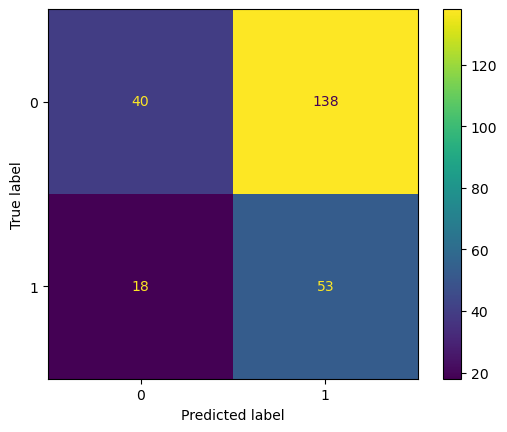

The accuracy score of ORB with color cam is 0.37349397590361444


In [11]:
# model evaluation
descriptors_color_test = ORB_color(X_test['color_cam_path'].values.tolist())
featrues_color_test = feature_extraction(descriptors_color_test)
y_pred_color = clf_color.predict(featrues_color_test)
evaluate_model(y_test, y_pred_color, 'ORB', 'color cam', list_of_accuracy)

In [12]:
# Model training using ORB with side cam
descriptors_side = ORB_side(X_train['side_cam_path'].values.tolist())
featrues_side = feature_extraction(descriptors_side)
clf_side = train_and_classify(featrues_side, y_train)

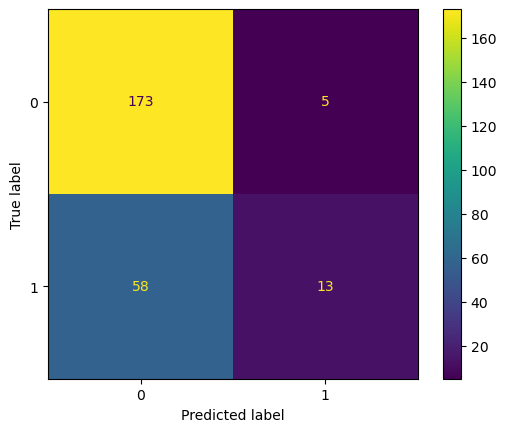

The accuracy score of ORB with color cam is 0.37349397590361444
The accuracy score of ORB with side cam is 0.7469879518072289


In [13]:
# Model evaluation
descriptors_side_test = ORB_side(X_test['side_cam_path'].values.tolist())
featrues_side_test = feature_extraction(descriptors_side_test)
y_pred_side = clf_side.predict(featrues_side_test)
evaluate_model(y_test, y_pred_side, 'ORB', 'side cam', list_of_accuracy)

#### Feature extraction using BRISK

In [14]:
def BRISK_color(paths):
    des_list = []
    brisk = cv2.BRISK_create(100)
    for i in range(0, len(paths)):
        img = cv2.imread(paths[i])
        kp, des = brisk.detectAndCompute(img, None)
        des_list.append((paths[i], des))
    return des_list

def BRISK_side(paths):
    des_list = []
    brisk = cv2.BRISK_create(100)
    for i in range(0, len(paths)):
        img = cv2.imread(paths[i])
        kp, des = brisk.detectAndCompute(img, None)
        des_list.append((paths[i], des))
    return des_list

In [15]:
# Model training using BRISK with color cam
descriptors_color_BRISK = BRISK_color(X_train['color_cam_path'].values.tolist())
featrues_color_BRISK = feature_extraction(descriptors_color_BRISK)
clf_color_BRISK = train_and_classify(featrues_color_BRISK, y_train)

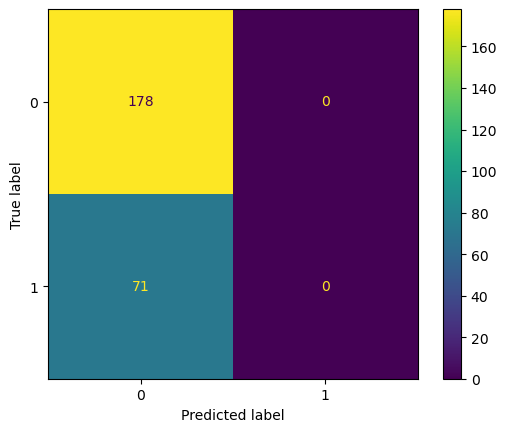

The accuracy score of ORB with color cam is 0.37349397590361444
The accuracy score of ORB with side cam is 0.7469879518072289
The accuracy score of BRISK with color cam is 0.714859437751004


In [16]:
# model evaluation
descriptors_color_test_BRISK = BRISK_color(X_test['color_cam_path'].values.tolist())
featrues_color_test_BRISK = feature_extraction(descriptors_color_test_BRISK)
y_pred_color_BRISK = clf_color_BRISK.predict(featrues_color_test_BRISK)
evaluate_model(y_test, y_pred_color_BRISK, 'BRISK', 'color cam', list_of_accuracy)

In [17]:
#Model training using BRISK with side cam
descriptors_side_BRISK = BRISK_side(X_train['side_cam_path'].values.tolist())
featrues_side_BRISK = feature_extraction(descriptors_side_BRISK)
clf_side_BRISK = train_and_classify(featrues_side_BRISK, y_train)

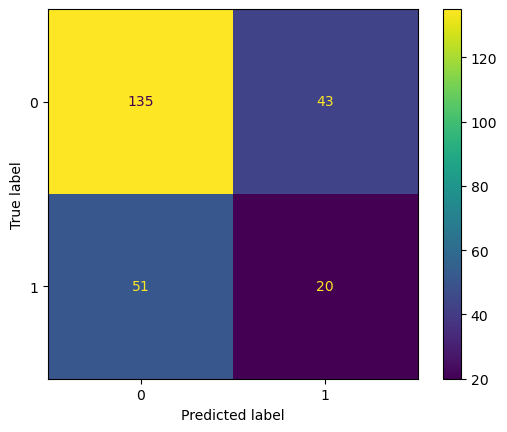

The accuracy score of ORB with color cam is 0.37349397590361444
The accuracy score of ORB with side cam is 0.7469879518072289
The accuracy score of BRISK with color cam is 0.714859437751004
The accuracy score of BRISK with side cam is 0.6224899598393574


In [18]:
# Model evaluation
descriptors_side_test_BRISK = BRISK_side(X_test['side_cam_path'].values.tolist())
featrues_side_test_BRISK = feature_extraction(descriptors_side_test_BRISK)
y_pred_side_BRISK = clf_side_BRISK.predict(featrues_side_test_BRISK)
evaluate_model(y_test, y_pred_side_BRISK, 'BRISK', 'side cam', list_of_accuracy)

#### Feature extraction using SIFT

In [19]:
def SIFT_color(paths):
    des_list = []
    sift = cv2.xfeatures2d.SIFT_create(400)
    for i in range(0, len(paths)):
        img = cv2.imread(paths[i], 0)
        kp, des = sift.detectAndCompute(img, None)
        des_list.append((paths[i], des))
    return des_list

def SIFT_side(paths):
    des_list = []
    sift = cv2.xfeatures2d.SIFT_create(400)
    for i in range(0, len(paths)):
        img = cv2.imread(paths[i])
        kp, des = sift.detectAndCompute(img, None)
        des_list.append((paths[i], des))
    return des_list

In [20]:
# Model training using SIFT with color cam
descriptors_color_SIFT = SIFT_color(X_train['color_cam_path'].values.tolist())
featrues_color_SIFT = feature_extraction(descriptors_color_SIFT)
clf_color_SIFT = train_and_classify(featrues_color_SIFT, y_train)

[ WARN:0@2173.610] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_506zufg7xt/croots/recipe/opencv-suite_1664548331847/work/opencv_contrib-4.6.0/modules/xfeatures2d/misc/python/shadow_sift.hpp (15) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


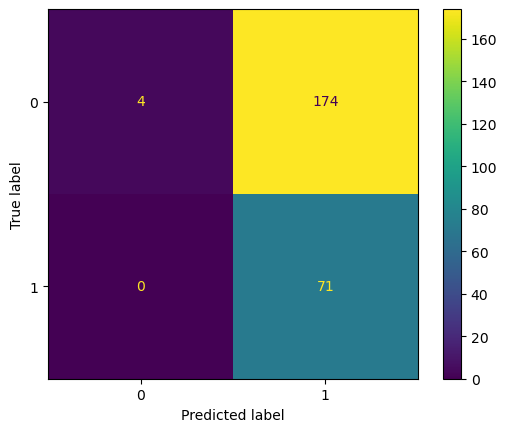

The accuracy score of ORB with color cam is 0.37349397590361444
The accuracy score of ORB with side cam is 0.7469879518072289
The accuracy score of BRISK with color cam is 0.714859437751004
The accuracy score of BRISK with side cam is 0.6224899598393574
The accuracy score of SIFT with color cam is 0.30120481927710846


In [21]:
# model evaluation
descriptors_color_test_SIFT = SIFT_color(X_test['color_cam_path'].values.tolist())
featrues_color_test_SIFT = feature_extraction(descriptors_color_test_SIFT)
y_pred_color_SIFT = clf_color_SIFT.predict(featrues_color_test_SIFT)
evaluate_model(y_test, y_pred_color_SIFT, 'SIFT', 'color cam', list_of_accuracy)

In [22]:
# Model training using SIFT with side cam
descriptors_side_SIFT = SIFT_side(X_train['side_cam_path'].values.tolist())
featrues_side_SIFT = feature_extraction(descriptors_side_SIFT)
clf_side_SIFT = train_and_classify(featrues_side_SIFT, y_train)

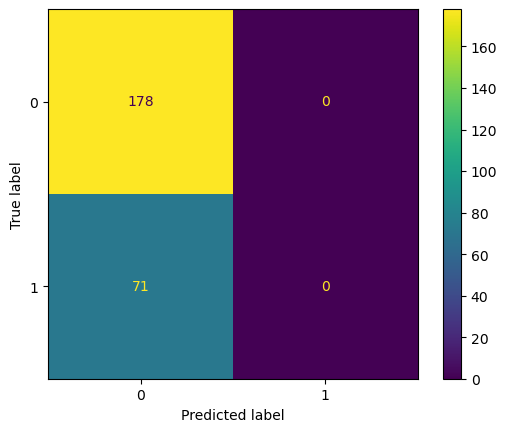

The accuracy score of ORB with color cam is 0.37349397590361444
The accuracy score of ORB with side cam is 0.7469879518072289
The accuracy score of BRISK with color cam is 0.714859437751004
The accuracy score of BRISK with side cam is 0.6224899598393574
The accuracy score of SIFT with color cam is 0.30120481927710846
The accuracy score of SIFT with side cam is 0.714859437751004


In [23]:
# Model evaluation
descriptors_side_test_SIFT = SIFT_side(X_test['side_cam_path'].values.tolist())
featrues_side_test_SIFT = feature_extraction(descriptors_side_test_SIFT)
y_pred_side_SIFT = clf_side_SIFT.predict(featrues_side_test_SIFT)
evaluate_model(y_test, y_pred_side_SIFT, 'SIFT', 'side cam', list_of_accuracy)

#### Result after data fusion

In [24]:
y_test = y_test.reset_index(drop=True)
y_pred_color = (y_pred_color*0.1 + y_pred_color_BRISK*0.8 + y_pred_color_SIFT*0.1) / 3
y_color_weighted = np.where(y_pred_color >= 0.5, 1, 0)
result = pd.concat([y_test, pd.DataFrame(y_color_weighted, columns=['color_cam_prediction'])], axis=1)
print(
    f"The accuracy score of color_cam_prediction is {accuracy_score(result[['labels']], result[['color_cam_prediction']])}")

# Classification of side cam
y_pred_side = (y_pred_side * 0.45 + y_pred_side_SIFT * 0.45 + y_pred_side_BRISK*0.1) / 3
y_side_weighted = np.where(y_pred_side >= 0.5, 1, 0)
result = pd.concat([result, pd.DataFrame(y_side_weighted, columns=['side_cam_prediction'])], axis=1)
print(
    f"The accuracy score of side_cam_prediction is {accuracy_score(result[['labels']], result[['side_cam_prediction']])}")

# Assign weight to the results of color cam and side cam
result['prediction'] = (result['color_cam_prediction'] + result['side_cam_prediction']) / 2
result['prediction'] = np.where(result['prediction'] >= 0.5, 1, 0)
print(f"The accuracy score of prediction is {accuracy_score(result[['labels']], result[['prediction']])}")

The accuracy score of color_cam_prediction is 0.714859437751004
The accuracy score of side_cam_prediction is 0.714859437751004
The accuracy score of prediction is 0.714859437751004
